##US Foods – Daily Delivery Service Analytics
 
US Foods is a national food distributor where we service restaurants and other operators that provide food service. ***Although most customer typically receive deliveries twice a week, US Foods is considering offering a daily delivery service to some customers as part of an enhanced service strategy.*** We believe that this new service will help operators get the restaurant supplies they need precisely when they need it, so they can provide their customers with the best dining experience and more effectively manage their inventory.

However, this enhanced service comes at an ***increased cost to serve.*** So, to better understand which customers would benefit the most from this new daily delivery service, market research was conducted with a randomized set of customers (results attached here). ***You have been tasked with determining which customer is best to target for this new service offering.***



 
## For Decision Scientists: Your business stakeholders are wondering how this data will help us refine our business strategy. Please answer the following questions: 

* **What is the business objective you are looking to solve for? Specifically, what decisions are you going to inform?**
  * Find the customers that will spend the most money for a daily delivery service. This can be meausred with high "weekly daily service spending". In order to determine which customers to target for this service, the customers need to have specific features, characteristics, and behaviors that relate and contribute to high daily service spending.

* **Based on your exploration of the data, what insights do you have about our customers?**
  - Using default assessment dataset:
    - Average weekly amount spent by customer for daily delivery service: $3430.16
    
    - Average weekly amount spent by customers: $5215.37
    
    - Average Weekly amount spent by customers on other distributors, services, and competitors: $2199.94
    
    - More money is spent on proteins (COP) over produce
    - Most customers rank small quantities, delivery flexibility, and cut time low levels

  - When dividing customers into USF only customers and Customers w/ competitors:
    - **Customers who do not primarily use USF (compared to fully USF Customers):**
      - **Spend more on daily delivery service than USF only customers**
        - $3710.33 avg weekly spending on daily service vs $3191.10 (fully USF Customer)
      - spend more money with competitors / other distributors
      - $4778.00 avg weekly spending on comeptitors vs $2809.60 avg weekly spending USF
        - this avg appears in the upper 75% quantile, 50% quantile of competitor spending is around $1750 and is close to the 50% quantile of usf spending which is $1262.00, difference could be due to bigger outlier in competitor spending column
      - **Value small quantity ordering, flexible delivery, and cut time higher**
        - 50% quantiles rank 4, 5, 7 respectively
      - Higher weekly spending of center of plate (~$0000) and produce(~$0000) higher
        - ~ $2000 and $1300 difference respectively
  - From Transactional dataset:
    - average amount of orders placed weekly is ~2 with one entry recording 128 orders in a week
    - On average about 45% of purchases are exclusive brands
    - around 90 cases a week are purchased on average
    - 61 types of menus, with a majority being unavailable
      - next being varied menu, bar and grill, mexican, and american 
      - many others have 1 entry
    - majority of customers are independent restaurants
      - followed by Hospitality, Education, and other
  

- **Develop a visualization tool or output that can be used to support the business decisions. What recommendations can you make to the business?**
  - Target customers who:
    - Have the following menu types (besides unavailable menus):
      - varied menus
      - bar and grill
        - COP (protein) spending
      - Italian pizza and pasta
      - steak and seafood
        - COP (protein) spending
    - Classify as the following Pyramid segmentation (PYR):
      - independent restaurants
        - higher variablity in frequency of their customers
      - hospitality
        - same as above
      - education
        - education usually has set amount of students for entire term, so they should know how much they need to order every week but plot shows otherwise
    - have high weekly spending on COP (protein)
      - ingredients could be more in demand, more fresh ingredient
    - have high weekly spending with #1 competitor
      - if other service (competitor) does not offer daily delivery, then customers could utilize USF for this feature
    - customers who value small quantity ordering highly
      - being able to order when needed instead of bulk and get it next day --> benefit from daily service
      - only applies to customers who are not fully USF supplied ("REPORTED_WKLY_SPEND_COMP" != 0, check "USF vs w/ competitors analysis below) 

* **How would you partner with the broader analytics team (including data scientists) to enhance this analysis?**
  - need cleaner data / found potential errors --> data engineers
    - Lots of outlier values (some spending $120k in one variable when 75% = 6k, $500k weekly max, etc.)
    - data not normal distribution, response variable right skewed
    - repeated customers with same values for certain columns and different for others, refer to customer #40724 in assessment dataset
    - customers in transactions dataset not in assessment data and vice versa
      - could not merge information such as weekly orders, menu types, pyramid structure, etc without losing 1/3 of data (4106 rows --> 2338 rows)
  - need more data / features of customers --> market
    - get more ranking data
      - 1-10 how often do you run out of stock? 
  - Present the variables above to data scientist to create a model and determine how accurately it can predict how much a customer would spend on daily service

## For Data Scientists: Your business stakeholders are wondering how this data will help us refine our business strategy. Please answer the following questions: 

* **What is the business objective you are looking to solve for? Specifically, what decisions are you going to inform?**
  - Create a model that accurately identifies which customer would best benefit from the daily delivery service in order to maximize the investment and profit.
  - Create a model that can accurately predict how much a customer would spend on the USF daily delivery service in order to determine if service should be offered to them or not to maximize the investment and profit

* **Which variable/s would you select as independent/dependent variables? And why?**
  - dependent (y): "REPORTED_WKLY_SPEND_USF_DAILY_SERVICE"
    - would be a regression model
    - could also be a classifcation model if there is a set value as a cutoff for weekly spending daily service that represents yes / no for daily service (explained below in feature engineering section)
  - independent (x):
    - center of plate spending
    - competitor 1 spending
    - small quantity ranking
    - type of business (pyramid segmentation)
    - type of menu (menu desc)

* **What kind of feature engineering did you (or would you) try on these variables?**
  - Would create new response variable = "Offer_Service"
    - for values in "REPORTED_WKLY_SPEND_USF_DAILY_SERVICE", if value >= x (amount that meets / exceeds quota), then value = 1 for "yes" (0 for "no")
    - If the cost of investment to measure whether the service is worth it on a daily scale, then divide weekly spending of daily service of the customers by 7 to get "Average daily usf service spending"
      - then use this to compare the amount of money is invested per day to keep service going
  - create an indicator varible that represents whether customer is fully USF or not
    - for value in "REPORTED_WKLY_SPEND_COMP", if value == 0, then "USFCust" = 1 (yes), else 0 (no) 
  - scale / normalize spending variables (continuous)
  - one hot encode categorical variables such as menu type and pyramid segmentation
  - Removed outliers for analysis purpose
    - lots of outliers in the dataset for each variable, can be seen in statistical analysis
      - mean + 1.96(std) = 95%, anything over considered outlier (non-normal distributed data)
      - +/- 3 std of mean = outlier (originally done but figured was only for normal distributed data, still used for some analysis)
  - Would remove repeats of entries
    - ex, customer #4027 has 4 entries, some inconsistent info
  - Joined datasets to determine what type of business ("PYR_SEG_CD") and menu type ("MENU") spends the most on daily delivery service


* **Choose a model that you believe best fits the dataset. Why did you choose this model?**
  - Continuous and Categorical variables to measure weekly spending on daily service -> ensemble machine learning methods such as extra trees regression or gradient boosting regression, use grid search to find parameters that yield best accuracy

* **Explain the accuracy of your model. Along with the explanation include any distinction or nuance with results that you want to share with your audience.** 

* **Provide any recommendations you would suggest for actions to improve the success of this new service.**

In [ ]:
##import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

##Data Dictionary (Assessment dataset):

- CUST_NBR = Unique Identifier for a customer
- REPORTED_WKLY_SPEND = How much do you spend each week with all distributors
- *REPORTED_WKLY_SPEND_USF = How much do you spend each week with US Foods
- ***REPORTED_WKLY_SPEND_USF_DAILY_SERVICE = How much do you spend each week with the US Foods Daily Delivery Service
  - response variable? more money == better customer for this service
- REPORTED_WKLY_SPEND_COMP = How much do you spend each week with all our competitors
- REPORTED_WKLY_SPEND_COMPETITOR_1 = How much do you spend each week with our primary competitor 
- REPORTED_WKLY_SPEND_OTHER_BLD = How much do you spend each week with our other broadline competitors
- REPORTED_WKLY_SPEND_SPCLTY = How much do you spend each week with specialty distributors
- REPORTED_WKLY_SPEND_CC = How much do you spend each week at cash and carry stores (wholesale like costco)
- REPORTED_WKLY_SPEND_OTHER = How much do you spend each week with other distributors
- REPORTED_COP_SPEND = How much of your purchasing in dollars with all sellers is Center of Plate (Protein items)
- REPORTED_PRODUCE_SPEND = How much of your purchasing in dollars with all sellers is Produce
- SMALL_QTY_RANK = How important is being able to order small quantities of items [customer ranked 1-10, 0 means they didn't rank]
  - small quantities = more frequently == yes daily delivery
- DEL_FLEX_RANK = How important is having a flexible delivery schedule [customer ranked 1-10, 0 means they didn't rank]
  - higher rank means they want more fleixbility --> daily delivery 
- CUT_TIME_RANK = How important is a later order deadline [customer ranked 1-10, 0 means they didn't rank]
  - last minute orders for same day shipping? higher == yes daily delivery

In [ ]:
##read assessment xlsx as dataframe
data = pd.DataFrame(pd.read_excel("/content/survey_data_assessment.xlsx"))
data

,CUST_NBR,REPORTED_WKLY_SPEND,REPORTED_WKLY_SPEND_USF,REPORTED_WKLY_SPEND_USF_DAILY_SERVICE,REPORTED_WKLY_SPEND_COMP,REPORTED_WKLY_SPEND_COMPETITOR_1,REPORTED_WKLY_SPEND_OTHER_BLD,REPORTED_WKLY_SPEND_SPCLTY,REPORTED_WKLY_SPEND_CC,REPORTED_WKLY_SPEND_OTHER,REPORTED_COP_SPEND,REPORTED_PRODUCE_SPEND,SMALL_QTY_RANK,DEL_FLEX_RANK,CUT_TIME_RANK
0,24682,53874.745440,53731.461540,53803.103490,143.283897,0.0,143.283897,0.0,0.0,0.0,32253.205310,107.462923,10,9,4
1,40724,13023.918650,13023.918650,13023.918650,0.000000,0.0,0.000000,0.0,0.0,0.0,7814.351192,2604.783731,5,1,8
2,40724,13023.918650,13023.918650,13023.918650,0.000000,0.0,0.000000,0.0,0.0,0.0,6000.000000,2000.000000,8,9,1
3,40724,13023.918650,13023.918650,13023.918650,0.000000,0.0,0.000000,0.0,0.0,0.0,6000.000000,2000.000000,4,3,7
4,40724,13023.918650,13023.918650,13023.918650,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4026,29645,479.860192,479.860192,479.860192,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0,0,0
4027,119821,473.527692,473.527692,473.527692,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0,0,0
4028,117052,508.383269,508.383269,508.383269,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0,0,0
4029,139187,934.297115,934.297115,934.297115,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0,0,0


In [ ]:
##no missing values
data.isna().sum()

CUST_NBR                                 0
REPORTED_WKLY_SPEND                      0
REPORTED_WKLY_SPEND_USF                  0
REPORTED_WKLY_SPEND_USF_DAILY_SERVICE    0
REPORTED_WKLY_SPEND_COMP                 0
REPORTED_WKLY_SPEND_COMPETITOR_1         0
REPORTED_WKLY_SPEND_OTHER_BLD            0
REPORTED_WKLY_SPEND_SPCLTY               0
REPORTED_WKLY_SPEND_CC                   0
REPORTED_WKLY_SPEND_OTHER                0
REPORTED_COP_SPEND                       0
REPORTED_PRODUCE_SPEND                   0
SMALL_QTY_RANK                           0
DEL_FLEX_RANK                            0
CUT_TIME_RANK                            0
dtype: int64

In [ ]:
##check repeated entries
check = data[data['CUST_NBR'] == 40724]
check

,CUST_NBR,REPORTED_WKLY_SPEND,REPORTED_WKLY_SPEND_USF,REPORTED_WKLY_SPEND_USF_DAILY_SERVICE,REPORTED_WKLY_SPEND_COMP,REPORTED_WKLY_SPEND_COMPETITOR_1,REPORTED_WKLY_SPEND_OTHER_BLD,REPORTED_WKLY_SPEND_SPCLTY,REPORTED_WKLY_SPEND_CC,REPORTED_WKLY_SPEND_OTHER,REPORTED_COP_SPEND,REPORTED_PRODUCE_SPEND,SMALL_QTY_RANK,DEL_FLEX_RANK,CUT_TIME_RANK
1,40724,13023.91865,13023.91865,13023.91865,0.0,0.0,0.0,0.0,0.0,0.0,7814.351192,2604.783731,5,1,8
2,40724,13023.91865,13023.91865,13023.91865,0.0,0.0,0.0,0.0,0.0,0.0,6000.000000,2000.000000,8,9,1
3,40724,13023.91865,13023.91865,13023.91865,0.0,0.0,0.0,0.0,0.0,0.0,6000.000000,2000.000000,4,3,7
4,40724,13023.91865,13023.91865,13023.91865,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0,0,0


In [ ]:
##statistical summary of variables in assessment dataset
data.describe()

,CUST_NBR,REPORTED_WKLY_SPEND,REPORTED_WKLY_SPEND_USF,REPORTED_WKLY_SPEND_USF_DAILY_SERVICE,REPORTED_WKLY_SPEND_COMP,REPORTED_WKLY_SPEND_COMPETITOR_1,REPORTED_WKLY_SPEND_OTHER_BLD,REPORTED_WKLY_SPEND_SPCLTY,REPORTED_WKLY_SPEND_CC,REPORTED_WKLY_SPEND_OTHER,REPORTED_COP_SPEND,REPORTED_PRODUCE_SPEND,SMALL_QTY_RANK,DEL_FLEX_RANK,CUT_TIME_RANK
count,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000,4031.000000
mean,79179.888861,5215.375013,3015.434370,3430.162584,2199.940643,501.771061,537.087161,508.379956,92.100066,560.602400,1611.721781,918.306890,2.898536,3.249566,3.859092
std,45094.828668,15276.854097,6220.878068,6768.401664,13570.083163,2823.886528,4593.759525,8312.385673,585.524623,8315.863907,6357.561809,6936.147849,3.252848,3.476362,3.892920
min,151.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39862.000000,641.351154,226.458846,352.518654,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,80194.000000,2256.823462,1143.149038,1468.497500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,380.000000,150.000000,2.000000,2.000000,3.000000
75%,118713.000000,5368.265000,3329.482404,3872.522692,1500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1505.000000,800.000000,5.000000,6.000000,8.000000
max,155034.000000,508868.053500,122168.236200,125952.856200,505500.000000,100000.000000,200000.000000,500000.000000,25000.000000,400000.000000,229000.000000,400000.000000,10.000000,10.000000,10.000000


Notes:
- Average weekly amount spent by customer for daily delivery service: $3430.16

- Average weekly amount spent by customers: $5215.37


- Average Weekly amount spent by customers on other distributors, services, and competitors: $2199.94
  - "REPORTED_WKLY_SPEND_COMP" is the sum of all money spent on other business / services not USF related
    - if entry has this = 0 --> business fully uses USF services

- Most customers rank small quantities, delivery flexibility, and cut time low levels
  - check distributions

- More money spent on proteins (COP) over produce

- Lots of outliers for each variable, some repeated entries w/ different information as well

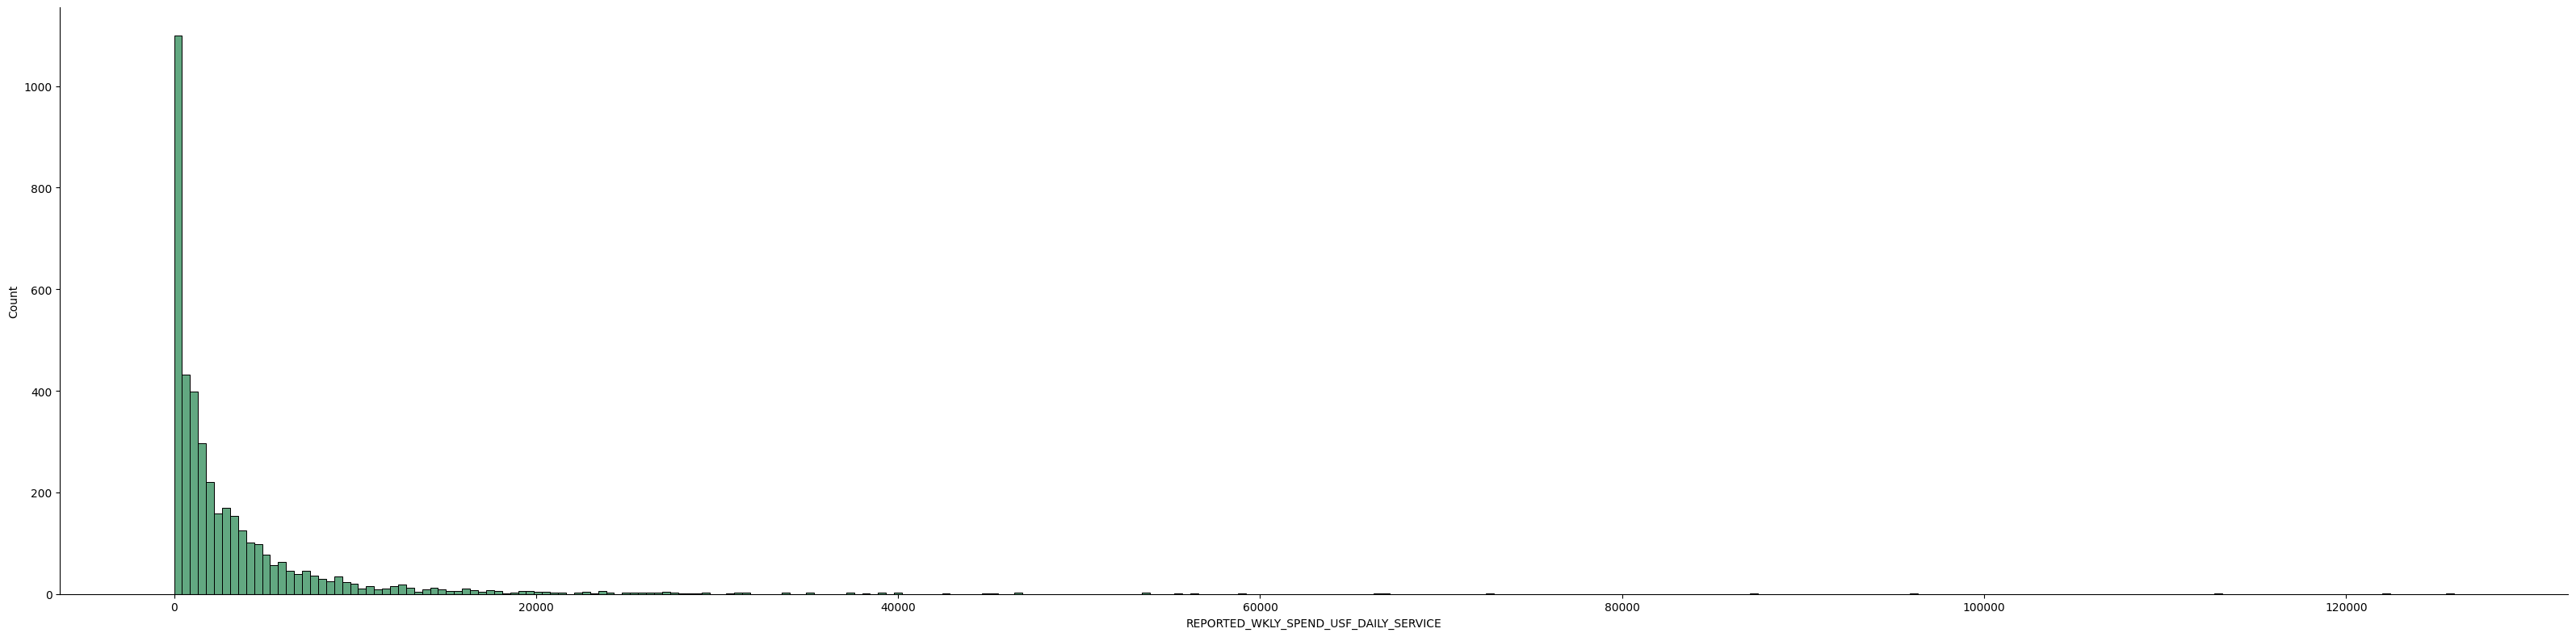

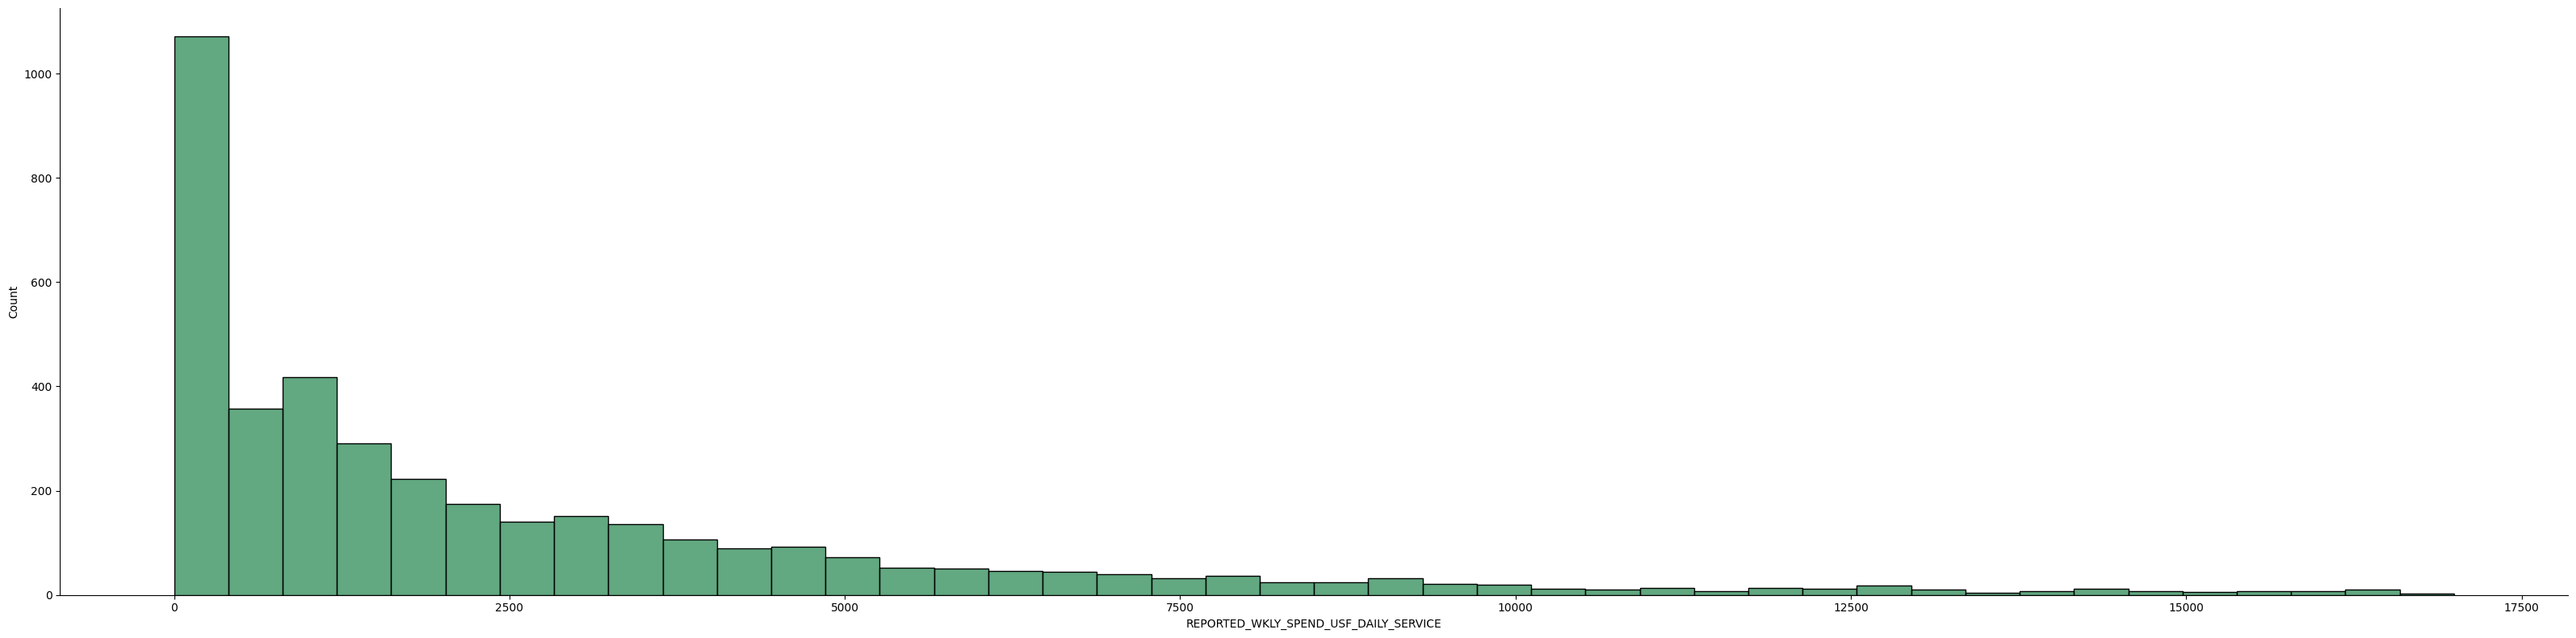

In [ ]:
color = "seagreen"
sns.displot(data, x="REPORTED_WKLY_SPEND_USF_DAILY_SERVICE", color = color, height=8, aspect=4)

##since data not normally distributed, limit to < 95% --> mean+-1.96(std) = ~ 16696.224
  ##could do mean + 3 std to visualize more but only applies to normally dist data
sns.displot(data.query("REPORTED_WKLY_SPEND_USF_DAILY_SERVICE < 17000"), x="REPORTED_WKLY_SPEND_USF_DAILY_SERVICE", color = color, height=8, aspect=4)


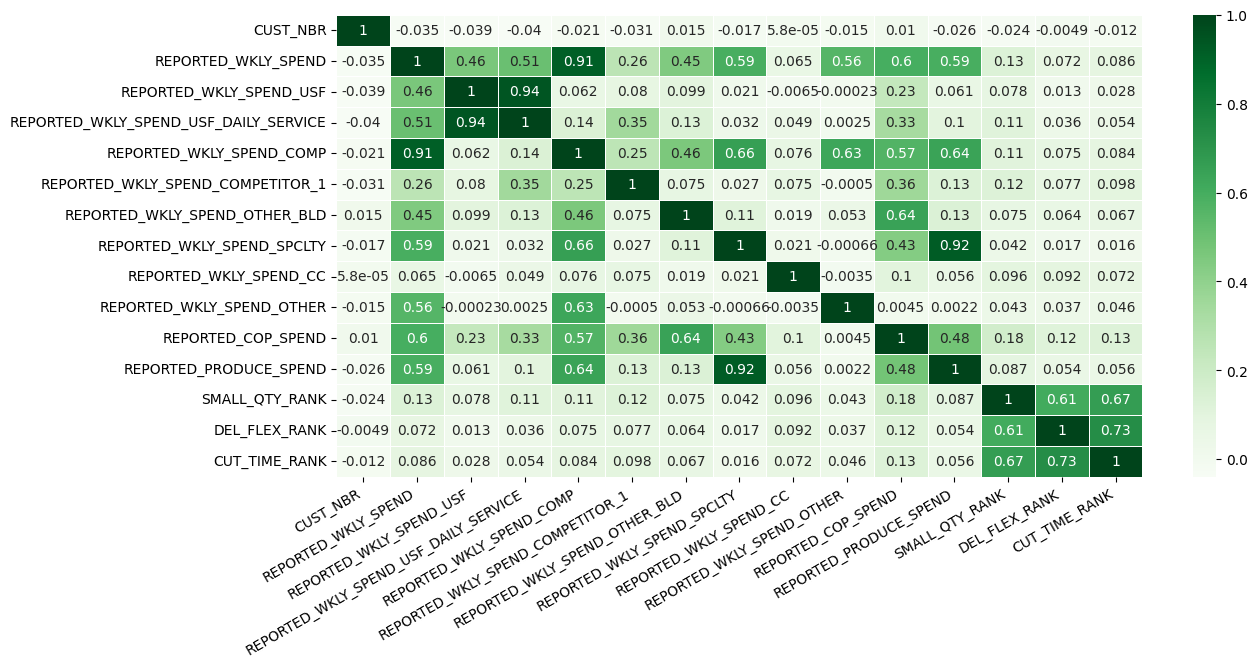

In [ ]:
##check which variables have correlation to USF_DAILY_SERVICE
correlations = data.corr()
plt.figure(figsize=(13, 6))
sns.heatmap(correlations, vmax=1, annot=True, linewidths=.5, cmap = "Greens")
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

Notes:
- appears that variables w/ some kind of correlation to daily service spending:
  - weekly spending with #1 competitor (0.35)
  - COP spending (0.33)
  - weekly spending with USF has highest (0.94) but is redundant to daily service spending
  - between ranknigs, small quantity has highest correlation (0.11)
    - very low, but check just in case

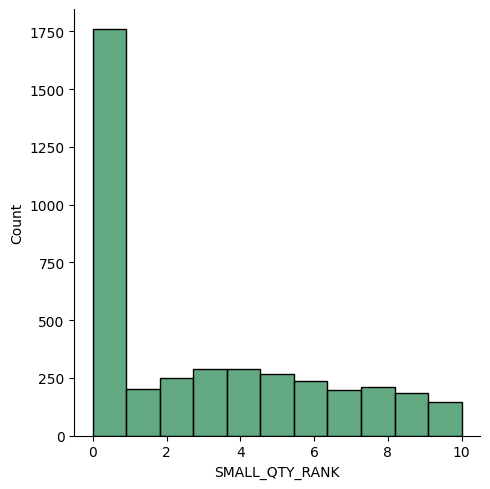

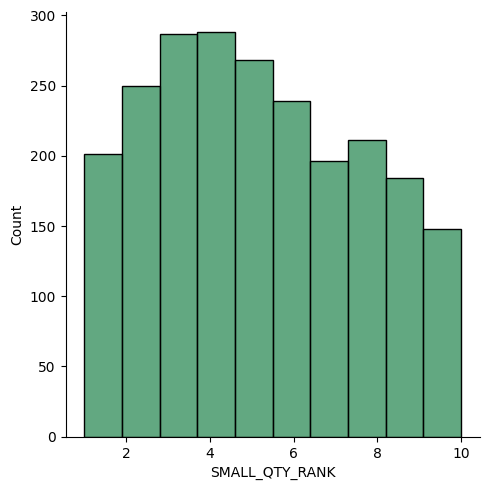

In [ ]:
sns.displot(data, x="SMALL_QTY_RANK", bins=11, color = color)
sns.displot(data.query("SMALL_QTY_RANK != 0"), x="SMALL_QTY_RANK", bins=10, color = color)

##no correlation
#sns.displot(data, x="DEL_FLEX_RANK", bins=11, color = color)
#sns.displot(data.query("DEL_FLEX_RANK != 0"), x="DEL_FLEX_RANK", bins=10, color = color)

##no correlation
#sns.displot(data, x="CUT_TIME_RANK", bins=11, color = color)
#sns.displot(data.query("CUT_TIME_RANK != 0"), x="CUT_TIME_RANK", bins=10, color = color)

Notes:
- A lot of entries did not rank as represented by the large count of 0 entries
- Most distributib of small qty rankings between 3 and 4

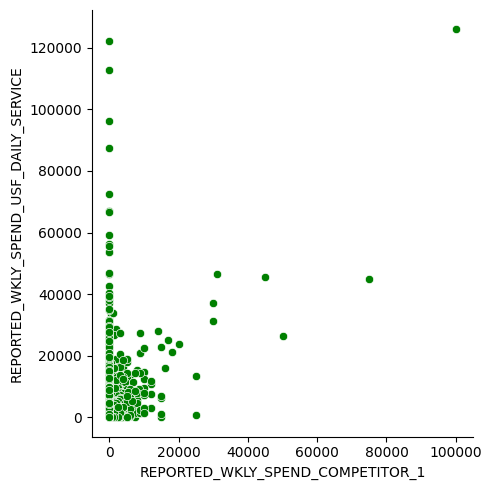

In [ ]:
##plot daily service spending vs #1 competitor spending
sns.relplot(data=data, y="REPORTED_WKLY_SPEND_USF_DAILY_SERVICE", x="REPORTED_WKLY_SPEND_COMPETITOR_1", color = "green")

<Axes: xlabel='REPORTED_WKLY_SPEND_COMPETITOR_1', ylabel='REPORTED_WKLY_SPEND_USF_DAILY_SERVICE'>

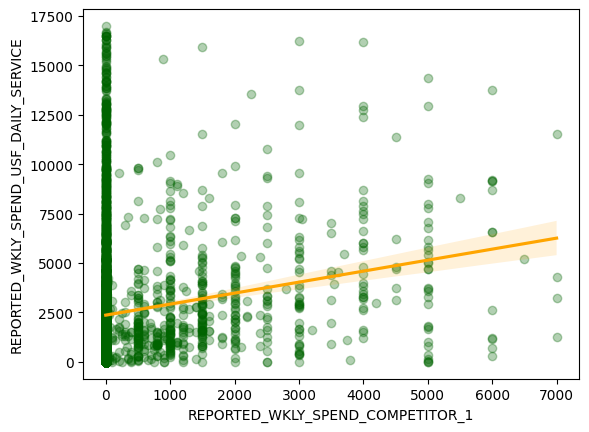

In [ ]:
###plot daily service spending vs #1 competitor spending W/O outliers (x < 95%)
subset = data.loc[(data['REPORTED_WKLY_SPEND_USF_DAILY_SERVICE'] <= 17000) & (data['REPORTED_WKLY_SPEND_COMPETITOR_1'] <=7000)]
sns.regplot(data = subset, y="REPORTED_WKLY_SPEND_USF_DAILY_SERVICE", x="REPORTED_WKLY_SPEND_COMPETITOR_1",
            scatter_kws= {"color": "darkgreen", "alpha": 0.3},
            line_kws = {"color": "orange"})

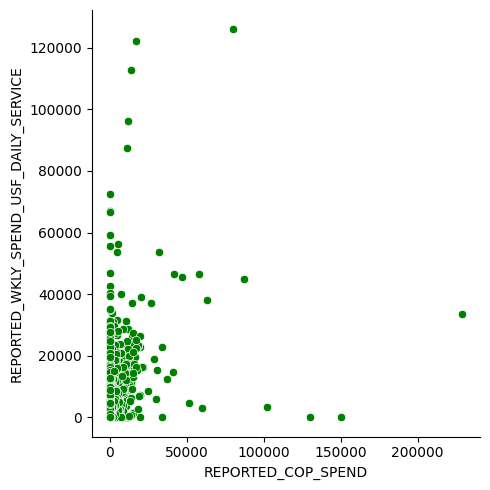

In [ ]:
##plot daily service spending vs COP spending
sns.relplot(data=data, y="REPORTED_WKLY_SPEND_USF_DAILY_SERVICE", x="REPORTED_COP_SPEND", color = "green")

<Axes: xlabel='REPORTED_COP_SPEND', ylabel='REPORTED_WKLY_SPEND_USF_DAILY_SERVICE'>

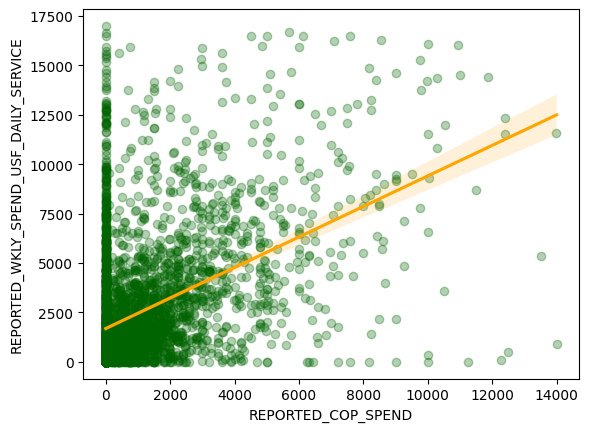

In [ ]:
###plot daily service spending vs COP spending W/O outliers (x < 95%)
subset = data.loc[(data['REPORTED_WKLY_SPEND_USF_DAILY_SERVICE'] <= 17000) & (data['REPORTED_COP_SPEND'] <= 14000)]
sns.regplot(data = subset, y="REPORTED_WKLY_SPEND_USF_DAILY_SERVICE", x="REPORTED_COP_SPEND",
            scatter_kws= {"color": "darkgreen", "alpha": 0.3},
            line_kws = {"color": "orange"})

Notes:
- some slight correlation to small qty ranking to daily service spending
  - being able to order small quantities...
- the more money spent on other competitor leads to higher daily service spending
  - could be customers who primarily order from competitors and will get smaller / missed items from USF and benefit from their daily delivery service
- the more money spent on protein leads to higher daily service spending
  - daily delivery of protein could lead to fresher ingredients
  - could be from restaurants that utilize / serve these kinds of ingredients
    - steakhouses, grills, etc




In [ ]:
##2 types of customers: Fully USFoods (REPORTED_WKLY_SPEND_COMP = 0) vs w/ competitors
usf_only = data[data['REPORTED_WKLY_SPEND_COMP'] == 0.000000]
usf_comp = data[data['REPORTED_WKLY_SPEND_COMP'] != 0.000000]

In [ ]:
usf_only.describe()

,CUST_NBR,REPORTED_WKLY_SPEND,REPORTED_WKLY_SPEND_USF,REPORTED_WKLY_SPEND_USF_DAILY_SERVICE,REPORTED_WKLY_SPEND_COMP,REPORTED_WKLY_SPEND_COMPETITOR_1,REPORTED_WKLY_SPEND_OTHER_BLD,REPORTED_WKLY_SPEND_SPCLTY,REPORTED_WKLY_SPEND_CC,REPORTED_WKLY_SPEND_OTHER,REPORTED_COP_SPEND,REPORTED_PRODUCE_SPEND,SMALL_QTY_RANK,DEL_FLEX_RANK,CUT_TIME_RANK
count,2175.000000,2175.000000,2175.000000,2175.000000,2175.0,2175.0,2175.0,2175.0,2175.0,2175.0,2175.000000,2175.000000,2175.000000,2175.000000,2175.000000
mean,79789.097931,3191.082973,3191.082973,3191.082973,0.0,0.0,0.0,0.0,0.0,0.0,600.661894,301.746553,1.617471,1.791724,2.047356
std,44709.867572,7170.875980,7170.875980,7170.875980,0.0,0.0,0.0,0.0,0.0,0.0,1733.751224,876.244418,2.875181,3.083673,3.386083
min,151.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40318.000000,108.856323,108.856323,108.856323,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,81675.000000,1040.984615,1040.984615,1040.984615,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,118156.000000,3600.461923,3600.461923,3600.461923,0.0,0.0,0.0,0.0,0.0,0.0,425.000000,175.000000,2.000000,3.000000,4.000000
max,155034.000000,122168.236200,122168.236200,122168.236200,0.0,0.0,0.0,0.0,0.0,0.0,33750.000000,15000.000000,10.000000,10.000000,10.000000


In [ ]:
usf_comp.describe()

,CUST_NBR,REPORTED_WKLY_SPEND,REPORTED_WKLY_SPEND_USF,REPORTED_WKLY_SPEND_USF_DAILY_SERVICE,REPORTED_WKLY_SPEND_COMP,REPORTED_WKLY_SPEND_COMPETITOR_1,REPORTED_WKLY_SPEND_OTHER_BLD,REPORTED_WKLY_SPEND_SPCLTY,REPORTED_WKLY_SPEND_CC,REPORTED_WKLY_SPEND_OTHER,REPORTED_COP_SPEND,REPORTED_PRODUCE_SPEND,SMALL_QTY_RANK,DEL_FLEX_RANK,CUT_TIME_RANK
count,1856.000000,1856.000000,1856.000000,1856.000000,1856.000000,1856.000000,1856.000000,1856.000000,1856.000000,1856.000000,1856.000000,1856.000000,1856.000000,1856.000000,1856.000000
mean,78465.971983,7587.592248,2809.596164,3710.334002,4777.996084,1089.784023,1166.486178,1104.137717,200.029830,1217.558337,2796.557586,1640.838535,4.399784,4.957974,5.982220
std,45543.508578,20888.397941,4871.517682,6254.232573,19691.022329,4084.500485,6716.473583,12225.090649,850.423076,12224.415421,9037.902172,10131.718453,3.019912,3.114242,3.335864
min,151.000000,59.218269,0.000000,0.000000,0.329197,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39234.500000,1881.471346,360.205144,808.145484,800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,450.000000,200.000000,2.000000,3.000000,4.000000
50%,78747.000000,3664.192789,1262.170674,1846.963173,1750.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1200.000000,600.000000,4.000000,5.000000,7.000000
75%,119139.000000,7540.459375,3104.151587,4103.215449,4000.000000,1000.000000,500.000000,500.000000,100.000000,400.000000,2550.000000,1450.000000,7.000000,8.000000,9.000000
max,154965.000000,508868.053500,53731.461540,125952.856200,505500.000000,100000.000000,200000.000000,500000.000000,25000.000000,400000.000000,229000.000000,400000.000000,10.000000,10.000000,10.000000


Notes:
- Customers who do not primarily use USF (compared to fully USF Customers): 
  - spend more money with competitors / other distributors
    - ~ $4778.00 weekly spending comeptitors vs $2809.60 weekly spending USF
      - mean appears in the upper 75% quantile, 50% quantile spending is around $1750 and is close to 50% quantile of USF sepdning of $1262.00
  - Spend more on daily delivery service than primary USF customers
    - ~ $3710.33 weekly spending on daily service vs $3191.10 (fully USF Customer)
  - Value small quantity ordering, flexible delivery, and cut time higher
    - 50% quantiles rank 4, 5, 7 respectively
  - Higher weekly spending of center of plate and produce higher
    - ~ $2000 and $1300 difference respectively

In [ ]:
##usf_only will have competitor and other related columns = 0 --> can drop
usf_only = usf_only.drop(columns = ["REPORTED_WKLY_SPEND_COMP", 
                                    "REPORTED_WKLY_SPEND_COMPETITOR_1", 
                                    "REPORTED_WKLY_SPEND_OTHER_BLD", 
                                    "REPORTED_WKLY_SPEND_SPCLTY", 
                                    "REPORTED_WKLY_SPEND_CC", 
                                    "REPORTED_WKLY_SPEND_OTHER"])

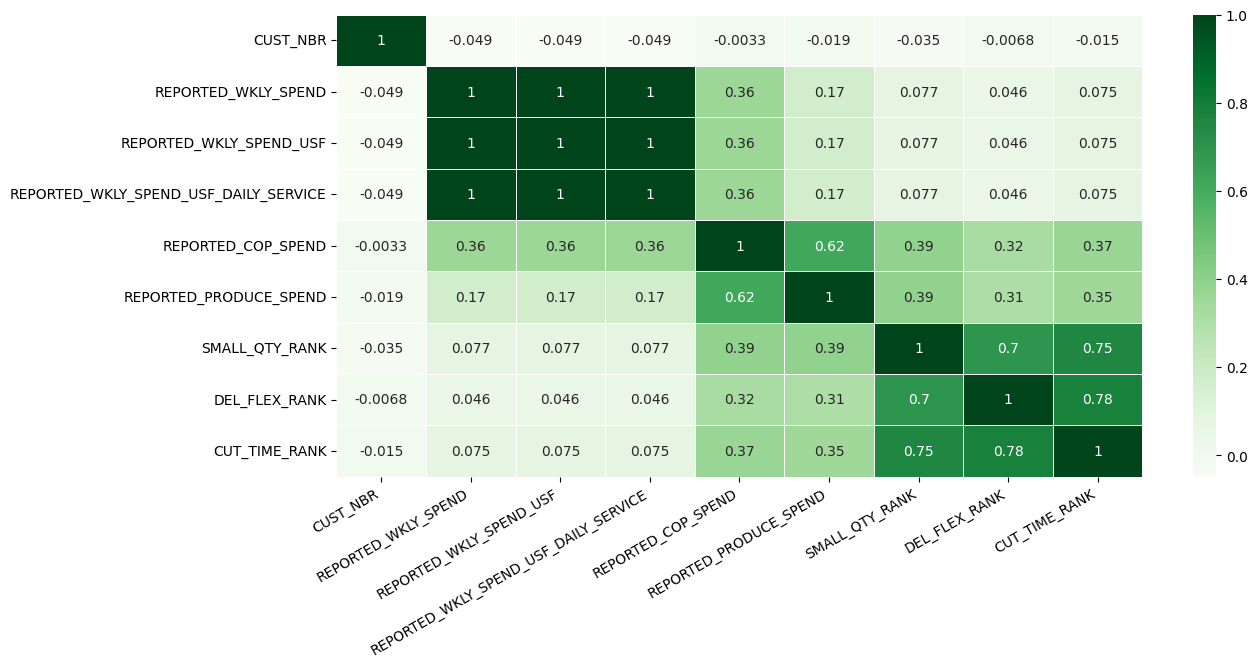

In [ ]:
usf_only_corr = usf_only.corr()
plt.figure(figsize=(13, 6))
sns.heatmap(usf_only_corr, vmax=1, annot=True, linewidths=.5, cmap="Greens")
sns.light_palette("seagreen", as_cmap=True)
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

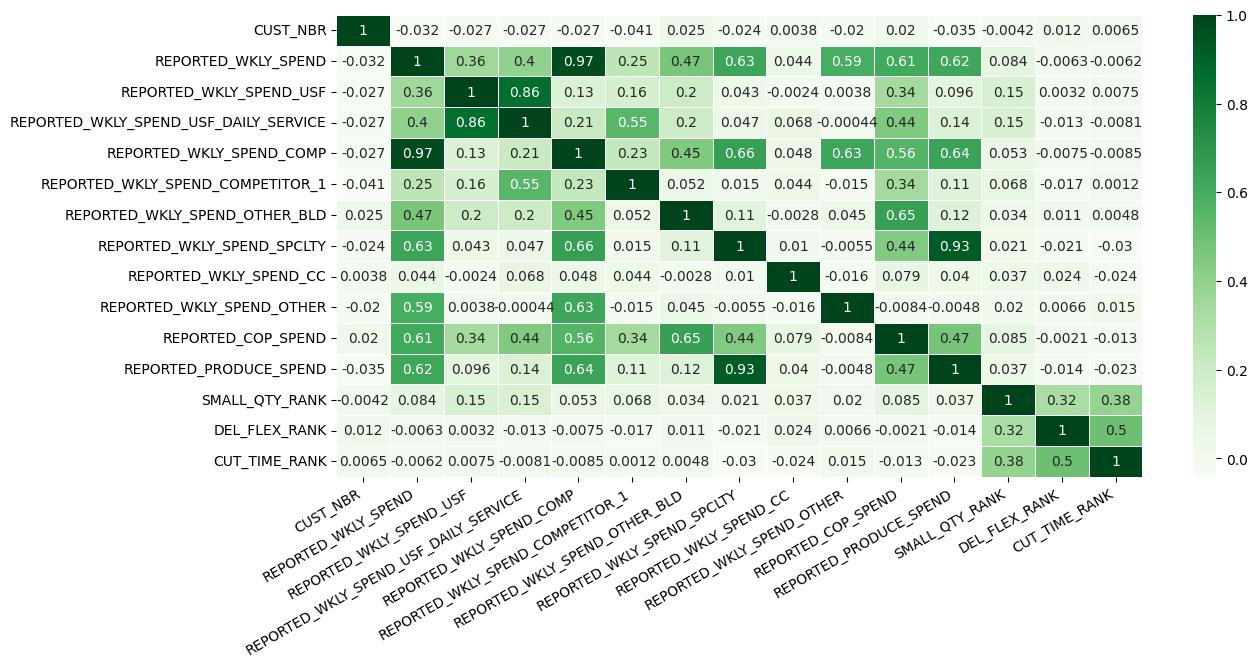

In [ ]:
usf_comp_corr = usf_comp.corr()
plt.figure(figsize=(13, 6))
sns.heatmap(usf_comp_corr, vmax=1, annot=True, linewidths=.5, cmap="Greens")
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

Notes:
- from the correlation matrix of customers who use other competitors, variables "REPORTED_WKLY_SPEND_COMPETITOR_1", "REPORTED_COP_SPEND" increased in correlation to weekly spending of daily delvery service
  - small increase in in "REPORTED_COP_SPEND" in fully USF Customers as well
- higher the spending in USF the higher spending in daily service
  - kind of redundant


<Axes: xlabel='REPORTED_WKLY_SPEND_COMPETITOR_1', ylabel='REPORTED_WKLY_SPEND_USF_DAILY_SERVICE'>

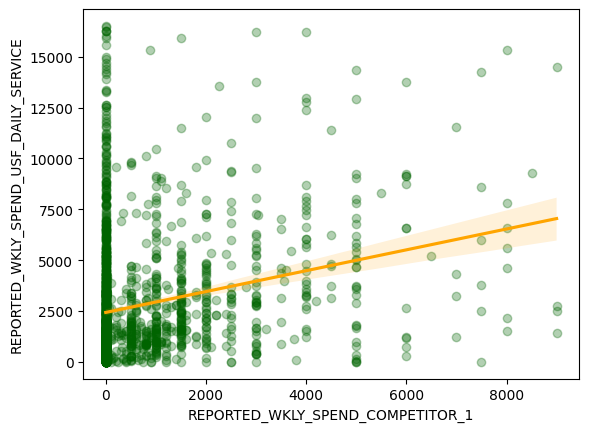

In [ ]:
subset = usf_comp.loc[(usf_comp['REPORTED_WKLY_SPEND_USF_DAILY_SERVICE'] <= 17000) & (usf_comp['REPORTED_WKLY_SPEND_COMPETITOR_1'] <= 9000)]
sns.regplot(data = subset, y="REPORTED_WKLY_SPEND_USF_DAILY_SERVICE", x="REPORTED_WKLY_SPEND_COMPETITOR_1",
            scatter_kws= {"color": "darkgreen", "alpha": 0.3},
            line_kws = {"color": "orange"})

<Axes: xlabel='REPORTED_COP_SPEND', ylabel='REPORTED_WKLY_SPEND_USF_DAILY_SERVICE'>

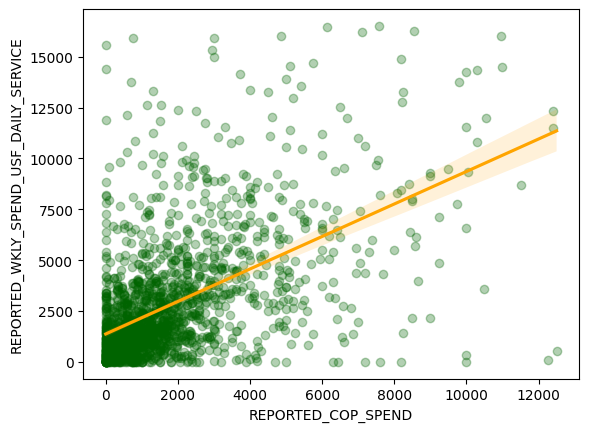

In [ ]:
subset = usf_comp.loc[(usf_comp['REPORTED_WKLY_SPEND_USF_DAILY_SERVICE'] <= 17000) & (usf_comp['REPORTED_COP_SPEND'] <= 13000)]
sns.regplot(data = subset, y="REPORTED_WKLY_SPEND_USF_DAILY_SERVICE", x="REPORTED_COP_SPEND",
            scatter_kws= {"color": "darkgreen", "alpha": 0.3},
            line_kws = {"color": "orange"})

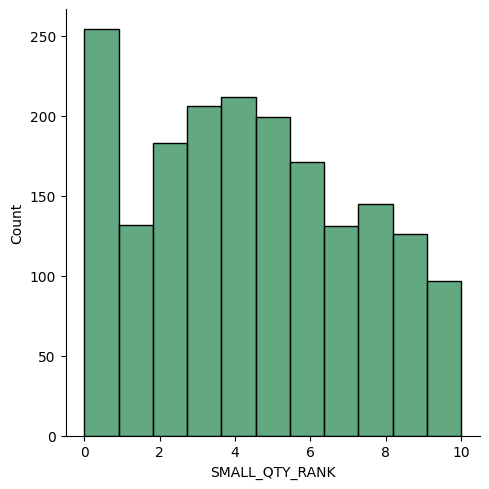

In [ ]:
sns.displot(usf_comp, x="SMALL_QTY_RANK", bins=11, color = color)

<Axes: xlabel='SMALL_QTY_RANK', ylabel='REPORTED_WKLY_SPEND_USF_DAILY_SERVICE'>

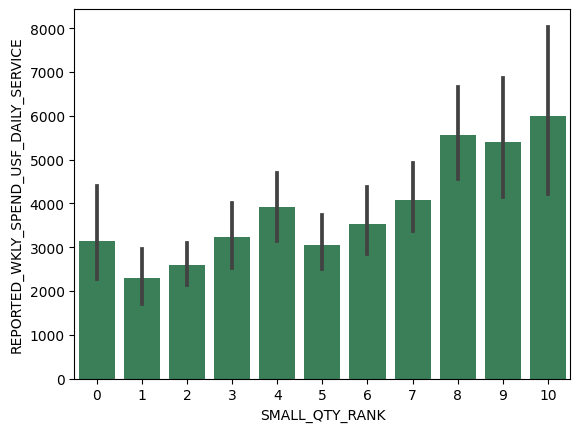

In [ ]:
sns.barplot(data=usf_comp, x= "SMALL_QTY_RANK", y= "REPORTED_WKLY_SPEND_USF_DAILY_SERVICE", color = "seagreen")

Notes
- interestingly, customers who are not fully USF appear to have variables that correlate more with daily service spending than customers who are fully USF
- #1 competitor spending and COP spending are 2 variables / factors of customers to look out for when deciding which type of customer to offer the dailt service to
- could also consider customers who value small quantity ordering
  - although correlation low, bar plot demonstrates positive relationship between high small quantity ranking and higher daily service spending

##Data Dictionary (Transactional dataset):
- DIV_NBR = Unique Identifier for a divison
- WKLY_ORDERS = weekly average of orders placed
  - higher weekly orders benefit from daily service
- PERC_EB = percentage of purchases that are exclusive brands
- MENU_TYP_DESC = classification of the restaurant's menu type
- PYR_SEG_CD = Pyramid segmentation of the restaurant 
- AVG_WKLY_SALES = weekly average sales dollars 
  - sales of customer or profit of USF?
- AVG_WKLY_CASES = weekly average cases purchased

In [ ]:
##read in transactions data
    ##every row represents customers per division
      ##some customers order from more than 1 division
transactions = pd.DataFrame(pd.read_excel("/content/transactional_data.xlsx"))
transactions

,CUST_NBR,DIV_NBR,WKLY_ORDERS,PERC_EB,MENU_TYP_DESC,PYR_SEG_CD,AVG_WKLY_SALES,AVG_WKLY_CASES
0,8602,1,1.361111,0.191835,MT UNAVAILABLE,Education,2656.049035,67.038552
1,73072,1,2.274510,0.317608,SANDWICHES / SOUPS / SALADS,Regional,3272.965625,77.259901
2,55380,1,1.500000,0.000594,SANDWICHES / SOUPS / SALADS,National Chain,2430.875214,38.476924
3,59961,1,1.196078,0.508769,VARIED MENU,Independent Restaurant,1457.359420,33.574309
4,8613,1,2.261905,0.741716,MT UNAVAILABLE,Retail,5466.262199,109.073858
...,...,...,...,...,...,...,...,...
10219,119406,75,1.509804,1.000000,MT UNAVAILABLE,Other,7901.866917,125.535072
10220,41243,75,1.580000,0.999486,MT UNAVAILABLE,Other,4894.450352,96.879674
10221,53562,76,1.000000,0.958062,MT UNAVAILABLE,Other,4498.273775,97.607578
10222,143999,77,3.538462,0.357131,MT UNAVAILABLE,Other,7333.749372,165.305149


In [ ]:
transactions.describe()

,CUST_NBR,DIV_NBR,WKLY_ORDERS,PERC_EB,AVG_WKLY_SALES,AVG_WKLY_CASES
count,10224.000000,10224.000000,10224.000000,10104.000000,10224.000000,10224.000000
mean,78590.027484,29.145638,2.401155,0.424265,4175.048472,93.229198
std,44737.588229,18.540849,3.071151,0.263363,2520.209952,147.067362
min,2.000000,1.000000,1.000000,0.000000,0.000000,0.333333
25%,39816.750000,13.000000,1.181818,0.219362,2821.192133,61.267006
50%,79316.500000,28.000000,1.625000,0.453692,3864.652001,82.967863
75%,117478.250000,43.000000,2.711538,0.608187,5044.711552,108.630771
max,155030.000000,77.000000,128.000000,1.000000,53731.461540,7968.705124


In [ ]:
##61 unique types of menus ranging from 4739 counts to 1
  ##majority of menu types unavailable
  ##some menu types may not be represented well given distribution
transactions['MENU_TYP_DESC'].value_counts()

MT UNAVAILABLE                        4739
VARIED MENU                           1116
BAR & GRILL                            722
MEXICAN                                500
AMERICAN                               484
                                      ... 
PASTRY & CAKES                           1
VIETNAMESE                               1
SUSHI                                    1
SOUTH & CENTRAL AMERICA/ CARIBBEAN       1
OTHER ETHNIC FOOD                        1
Name: MENU_TYP_DESC, Length: 61, dtype: int64

In [ ]:
##9 unique types of Pyramid segmentation of the restaurant
transactions['PYR_SEG_CD'].value_counts()

Independent Restaurant    4293
Other                     1388
Hospitality               1231
Education                 1054
National Chain             736
Health Care                635
Retail                     484
Regional                   293
Government                 110
Name: PYR_SEG_CD, dtype: int64

In [ ]:
transactions['CUST_NBR'].nunique(), data['CUST_NBR'].nunique()

(10000, 3805)

Notes:
- average amount of orders placed weekly is 2 with one entry recording 128
  - due to the previous twice a week delivery service?
- around 90 cases a week are purchased
- *Question: is "AVG_WKLY_SALES" for of the customer or USF?
- majority of menu types are unavailable, while many others have 1 entry
  - wil not be represented well
- majority of customers are independent restaurants
- *entries in trainsactions data are by div number (div_number --> specific location)
    * not every customer orders from every div number
    * could look into locational daily delivery service based on the amount of times a specific div_nbr has an order / number of customers order from specific div_nbr

In [ ]:
##merge menu_type_desc and pyr_seg_cd to cust_nbr in data dataframe
merged_data = pd.merge(data, transactions[['CUST_NBR','PYR_SEG_CD', 'MENU_TYP_DESC']], on='CUST_NBR', how='left')
merged_data

,CUST_NBR,REPORTED_WKLY_SPEND,REPORTED_WKLY_SPEND_USF,REPORTED_WKLY_SPEND_USF_DAILY_SERVICE,REPORTED_WKLY_SPEND_COMP,REPORTED_WKLY_SPEND_COMPETITOR_1,REPORTED_WKLY_SPEND_OTHER_BLD,REPORTED_WKLY_SPEND_SPCLTY,REPORTED_WKLY_SPEND_CC,REPORTED_WKLY_SPEND_OTHER,REPORTED_COP_SPEND,REPORTED_PRODUCE_SPEND,SMALL_QTY_RANK,DEL_FLEX_RANK,CUT_TIME_RANK,PYR_SEG_CD,MENU_TYP_DESC
0,24682,53874.745440,53731.461540,53803.103490,143.283897,0.0,143.283897,0.0,0.0,0.0,32253.205310,107.462923,10,9,4,Retail,MT UNAVAILABLE
1,40724,13023.918650,13023.918650,13023.918650,0.000000,0.0,0.000000,0.0,0.0,0.0,7814.351192,2604.783731,5,1,8,Hospitality,MT UNAVAILABLE
2,40724,13023.918650,13023.918650,13023.918650,0.000000,0.0,0.000000,0.0,0.0,0.0,6000.000000,2000.000000,8,9,1,Hospitality,MT UNAVAILABLE
3,40724,13023.918650,13023.918650,13023.918650,0.000000,0.0,0.000000,0.0,0.0,0.0,6000.000000,2000.000000,4,3,7,Hospitality,MT UNAVAILABLE
4,40724,13023.918650,13023.918650,13023.918650,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0,0,0,Hospitality,MT UNAVAILABLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4101,29645,479.860192,479.860192,479.860192,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0,0,0,NaN,NaN
4102,119821,473.527692,473.527692,473.527692,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0,0,0,Other,MT UNAVAILABLE
4103,117052,508.383269,508.383269,508.383269,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0,0,0,NaN,NaN
4104,139187,934.297115,934.297115,934.297115,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0,0,0,Hospitality,MT UNAVAILABLE


In [ ]:
##not all of the customers in assessment data are in transactions data
merged_data.isna().sum()

CUST_NBR                                    0
REPORTED_WKLY_SPEND                         0
REPORTED_WKLY_SPEND_USF                     0
REPORTED_WKLY_SPEND_USF_DAILY_SERVICE       0
REPORTED_WKLY_SPEND_COMP                    0
REPORTED_WKLY_SPEND_COMPETITOR_1            0
REPORTED_WKLY_SPEND_OTHER_BLD               0
REPORTED_WKLY_SPEND_SPCLTY                  0
REPORTED_WKLY_SPEND_CC                      0
REPORTED_WKLY_SPEND_OTHER                   0
REPORTED_COP_SPEND                          0
REPORTED_PRODUCE_SPEND                      0
SMALL_QTY_RANK                              0
DEL_FLEX_RANK                               0
CUT_TIME_RANK                               0
PYR_SEG_CD                               1768
MENU_TYP_DESC                            1768
dtype: int64

In [ ]:
data_custnbr = data[data['CUST_NBR'] == 29645]
data_custnbr

,CUST_NBR,REPORTED_WKLY_SPEND,REPORTED_WKLY_SPEND_USF,REPORTED_WKLY_SPEND_USF_DAILY_SERVICE,REPORTED_WKLY_SPEND_COMP,REPORTED_WKLY_SPEND_COMPETITOR_1,REPORTED_WKLY_SPEND_OTHER_BLD,REPORTED_WKLY_SPEND_SPCLTY,REPORTED_WKLY_SPEND_CC,REPORTED_WKLY_SPEND_OTHER,REPORTED_COP_SPEND,REPORTED_PRODUCE_SPEND,SMALL_QTY_RANK,DEL_FLEX_RANK,CUT_TIME_RANK
4026,29645,479.860192,479.860192,479.860192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [ ]:
transactions_custnbr = transactions[transactions['CUST_NBR'] == 29645]
transactions_custnbr

,CUST_NBR,DIV_NBR,WKLY_ORDERS,PERC_EB,MENU_TYP_DESC,PYR_SEG_CD,AVG_WKLY_SALES,AVG_WKLY_CASES


In [ ]:
merged_data_clean = merged_data.dropna()
merged_data_clean

,CUST_NBR,REPORTED_WKLY_SPEND,REPORTED_WKLY_SPEND_USF,REPORTED_WKLY_SPEND_USF_DAILY_SERVICE,REPORTED_WKLY_SPEND_COMP,REPORTED_WKLY_SPEND_COMPETITOR_1,REPORTED_WKLY_SPEND_OTHER_BLD,REPORTED_WKLY_SPEND_SPCLTY,REPORTED_WKLY_SPEND_CC,REPORTED_WKLY_SPEND_OTHER,REPORTED_COP_SPEND,REPORTED_PRODUCE_SPEND,SMALL_QTY_RANK,DEL_FLEX_RANK,CUT_TIME_RANK,PYR_SEG_CD,MENU_TYP_DESC
0,24682,53874.745440,53731.461540,53803.103490,143.283897,0.0,143.283897,0.0,0.0,0.0,32253.205310,107.462923,10,9,4,Retail,MT UNAVAILABLE
1,40724,13023.918650,13023.918650,13023.918650,0.000000,0.0,0.000000,0.0,0.0,0.0,7814.351192,2604.783731,5,1,8,Hospitality,MT UNAVAILABLE
2,40724,13023.918650,13023.918650,13023.918650,0.000000,0.0,0.000000,0.0,0.0,0.0,6000.000000,2000.000000,8,9,1,Hospitality,MT UNAVAILABLE
3,40724,13023.918650,13023.918650,13023.918650,0.000000,0.0,0.000000,0.0,0.0,0.0,6000.000000,2000.000000,4,3,7,Hospitality,MT UNAVAILABLE
4,40724,13023.918650,13023.918650,13023.918650,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0,0,0,Hospitality,MT UNAVAILABLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4098,123725,403.170769,403.170769,403.170769,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0,0,0,Independent Restaurant,AMERICAN
4099,100203,4409.227692,4409.227692,4409.227692,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0,0,0,Independent Restaurant,VARIED MENU
4100,59666,4640.681346,4640.681346,4640.681346,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0,0,0,Education,AMERICAN TRADITIONAL
4102,119821,473.527692,473.527692,473.527692,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0,0,0,Other,MT UNAVAILABLE


In [ ]:
merged_data_clean['MENU_TYP_DESC'].value_counts(), merged_data_clean['PYR_SEG_CD'].value_counts(), 

(MT UNAVAILABLE                                       808
 VARIED MENU                                          379
 BAR & GRILL                                          261
 ITALIAN- PIZZA & PASTA                               163
 AMERICAN                                             111
 MEXICAN                                               90
 STEAK & SEAFOOD                                       86
 BARBECUE                                              71
 SANDWICHES / SOUPS / SALADS                           60
 COFFEE / TEA                                          46
 HAMBURGERS                                            44
 SOUTHERN & SOUL                                       25
 GREEK                                                 20
 JAPANESE                                              17
 DONUTS                                                14
 FRIED CHICKEN                                         13
 FROZEN DESSERTS                                       12
 OTHER LATIN A

In [ ]:
merged_data_clean.describe()

,CUST_NBR,REPORTED_WKLY_SPEND,REPORTED_WKLY_SPEND_USF,REPORTED_WKLY_SPEND_USF_DAILY_SERVICE,REPORTED_WKLY_SPEND_COMP,REPORTED_WKLY_SPEND_COMPETITOR_1,REPORTED_WKLY_SPEND_OTHER_BLD,REPORTED_WKLY_SPEND_SPCLTY,REPORTED_WKLY_SPEND_CC,REPORTED_WKLY_SPEND_OTHER,REPORTED_COP_SPEND,REPORTED_PRODUCE_SPEND,SMALL_QTY_RANK,DEL_FLEX_RANK,CUT_TIME_RANK
count,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000
mean,79069.232250,5001.569239,3216.034186,3637.645603,1785.535053,495.367071,442.849715,334.917873,95.320167,417.080228,1511.823402,785.765253,2.932421,3.281009,3.925150
std,45067.262214,9751.076082,6051.192650,6828.220726,7018.028344,3262.385500,2209.085742,1874.283701,489.858471,4683.880214,4356.097491,2068.539459,3.267645,3.494379,3.914135
min,151.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40229.250000,806.456586,348.345577,478.375000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,78944.500000,2464.329327,1285.903557,1611.310769,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,400.000000,175.000000,2.000000,2.000000,3.500000
75%,119379.500000,5717.165200,3612.868605,4207.256346,1500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1600.000000,809.250000,5.000000,6.000000,8.000000
max,154926.000000,150928.193500,122168.236200,125952.856200,150011.000000,100000.000000,46000.000000,60000.000000,15000.000000,150011.000000,87500.000000,43750.000000,10.000000,10.000000,10.000000


Notes:
- Not all customers in the assessment dataset are in the transactioal dataset
  - represented by nan values after merge
  - lose 1768 rows, left with 2338 rows
- can still use to determine which types of menus / businesses contribute to higher weekly daily delivery service spending

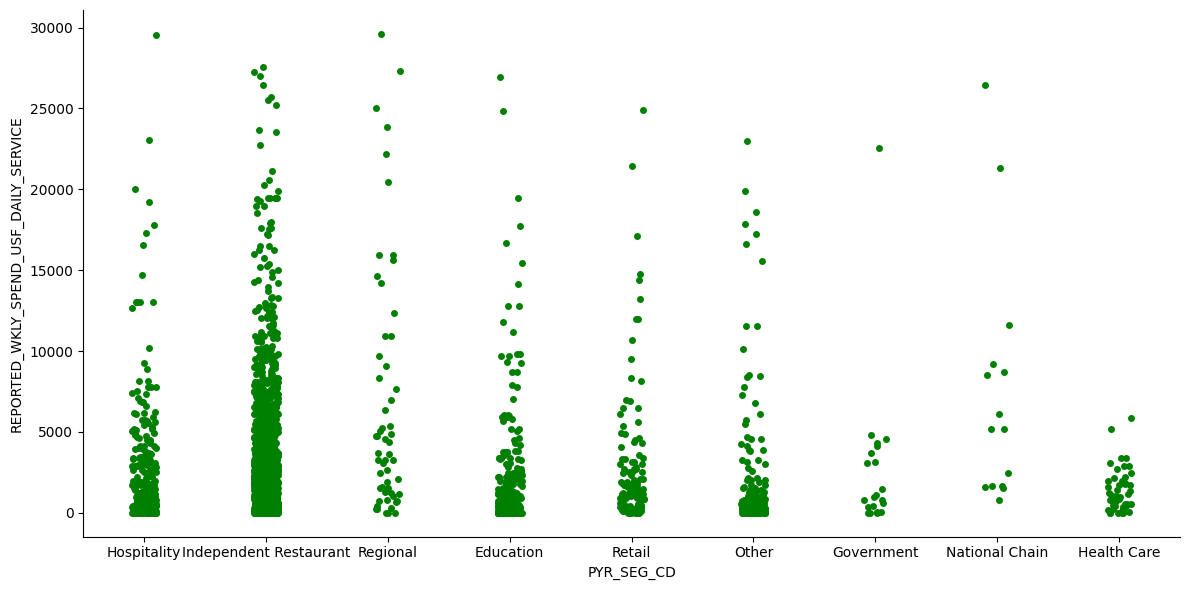

In [ ]:
sns.catplot(data=merged_data_clean.query("REPORTED_WKLY_SPEND_USF_DAILY_SERVICE <= 30000"), 
            x= "PYR_SEG_CD", 
            y= "REPORTED_WKLY_SPEND_USF_DAILY_SERVICE", 
            jitter = True, 
            height=6, aspect=2, color= "green")

<ipython-input-75-88a7c03d4bec>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)


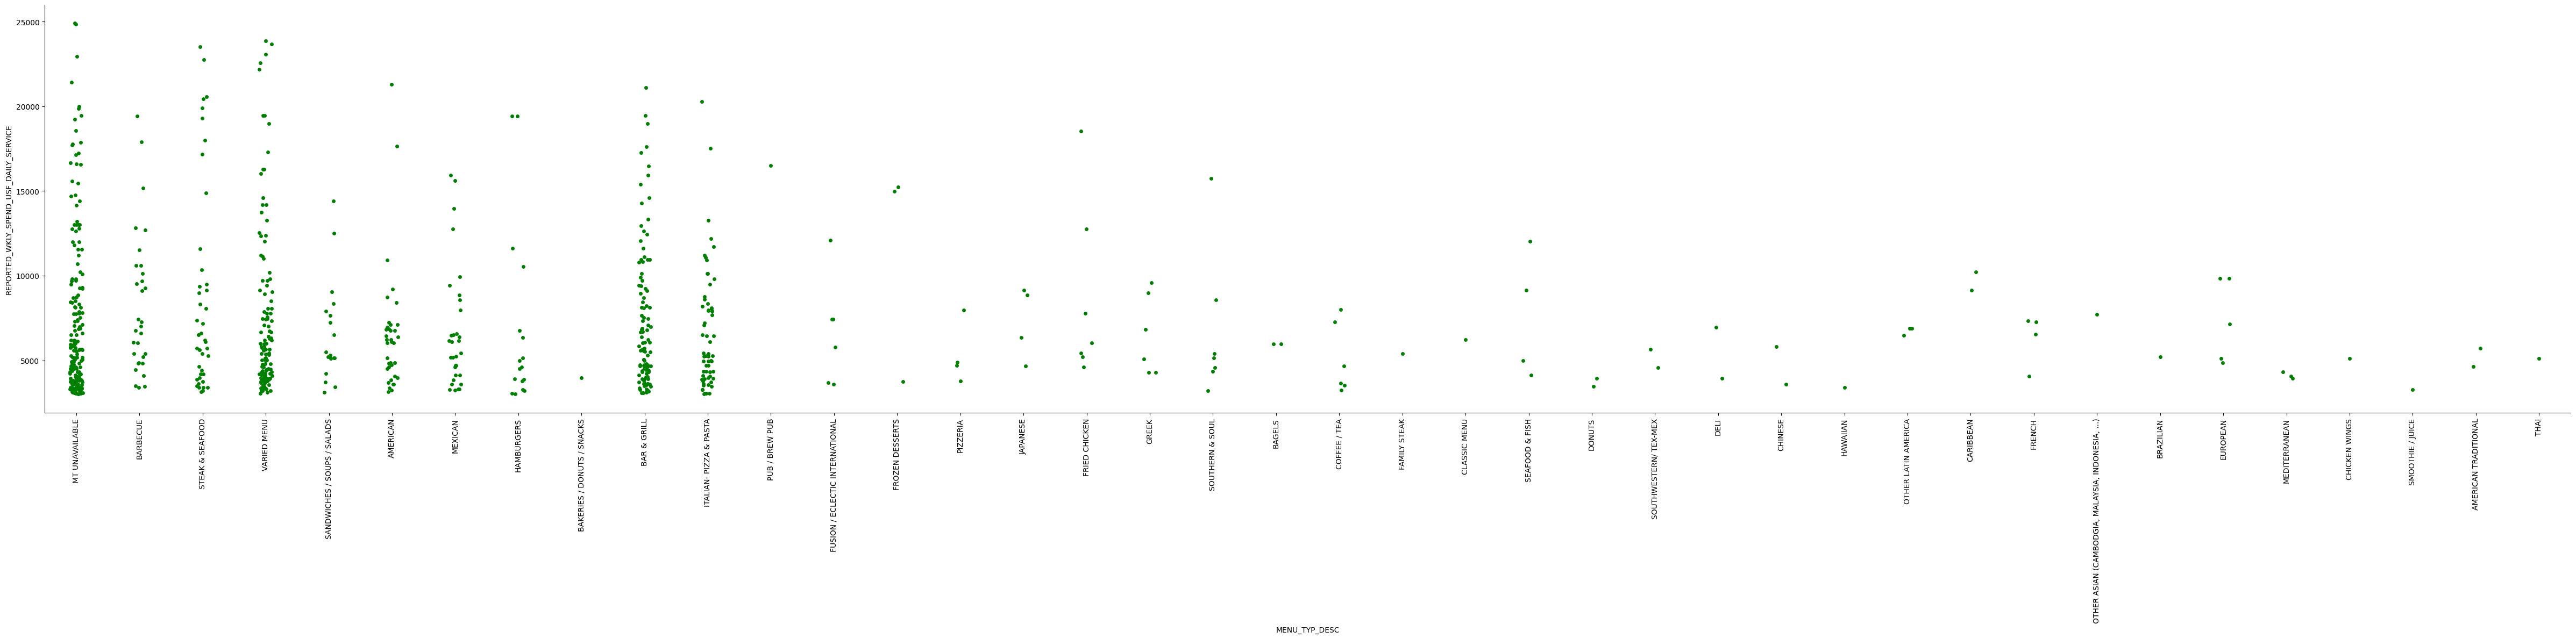

In [ ]:
menu_plot = sns.catplot(data=merged_data_clean.query("REPORTED_WKLY_SPEND_USF_DAILY_SERVICE >= 3000 & REPORTED_WKLY_SPEND_USF_DAILY_SERVICE <= 25000"), 
            x= "MENU_TYP_DESC", 
            y= "REPORTED_WKLY_SPEND_USF_DAILY_SERVICE", 
            jitter = True, 
            height=12, aspect=4,
            color = "green")

for axes in menu_plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()

Notes from the plots above:
- uneven distributions of types, some may not be represented well (ex: menus with only 1 count)
- types of businesses (PYR) that contribute to high weekly daily service spending:
  - independent restaurants
    - higher variablity of customers
  - hospitality
    - same as independent
  - education?
    - unsure since education usually has set amount of students for entire term, so they should know how much they need to order every week
- types of menus that contribute to high weekly daily service spending (besides unavailable menus):
  - varied menus
  - bar and grill
  - piza and pasta
  - steak and seafood?
    - could explain why center of plate (protein) variable has high correlation to daily service spending.

Overall:
- customers whos business and menus are above
- customers who have high weekly spending on COP (protein)
  - could be supported by types of menus above
- customers who spend money with #1 competitor also tend to spend more money on USF daily service
  - if other service (competitor) does not offer daily delivery, then customers could utilize USF for this feature
- customers who value small quantity ordering highly
  - being able to order when needed instead of bulk and get it next day --> benefit from daily service


##Model building

In [ ]:
##Create a variable that indicates whether or not customer is fully USF or w/ competitors
merged_data_clean

,CUST_NBR,REPORTED_WKLY_SPEND,REPORTED_WKLY_SPEND_USF,REPORTED_WKLY_SPEND_USF_DAILY_SERVICE,REPORTED_WKLY_SPEND_COMP,REPORTED_WKLY_SPEND_COMPETITOR_1,REPORTED_WKLY_SPEND_OTHER_BLD,REPORTED_WKLY_SPEND_SPCLTY,REPORTED_WKLY_SPEND_CC,REPORTED_WKLY_SPEND_OTHER,REPORTED_COP_SPEND,REPORTED_PRODUCE_SPEND,SMALL_QTY_RANK,DEL_FLEX_RANK,CUT_TIME_RANK,PYR_SEG_CD,MENU_TYP_DESC
0,24682,53874.745440,53731.461540,53803.103490,143.283897,0.0,143.283897,0.0,0.0,0.0,32253.205310,107.462923,10,9,4,Retail,MT UNAVAILABLE
1,40724,13023.918650,13023.918650,13023.918650,0.000000,0.0,0.000000,0.0,0.0,0.0,7814.351192,2604.783731,5,1,8,Hospitality,MT UNAVAILABLE
2,40724,13023.918650,13023.918650,13023.918650,0.000000,0.0,0.000000,0.0,0.0,0.0,6000.000000,2000.000000,8,9,1,Hospitality,MT UNAVAILABLE
3,40724,13023.918650,13023.918650,13023.918650,0.000000,0.0,0.000000,0.0,0.0,0.0,6000.000000,2000.000000,4,3,7,Hospitality,MT UNAVAILABLE
4,40724,13023.918650,13023.918650,13023.918650,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0,0,0,Hospitality,MT UNAVAILABLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4098,123725,403.170769,403.170769,403.170769,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0,0,0,Independent Restaurant,AMERICAN
4099,100203,4409.227692,4409.227692,4409.227692,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0,0,0,Independent Restaurant,VARIED MENU
4100,59666,4640.681346,4640.681346,4640.681346,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0,0,0,Education,AMERICAN TRADITIONAL
4102,119821,473.527692,473.527692,473.527692,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0,0,0,Other,MT UNAVAILABLE
